In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

In [7]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets = positive_tweets + negative_tweets
print("Tweets:",len(tweets))

Tweets: 10000


In [8]:
'''Labels array --> 1 for (+) and 0 for (-) sentiment'''
labels = np.append(np.ones((len(positive_tweets))), np.zeros((len(negative_tweets))))

### Frequency

In [18]:
from nlp import preprocess_tweet

In [27]:
def get_freq(tweets, labels):
    freq = {}
    labels = labels.tolist()
    
    for tweet, y in zip(tweets, labels):
        for word in preprocess_tweet(tweet):
            pair = (word, y)
            freq[pair] = freq.get(pair, 0) + 1
    
    return freq

In [29]:
freq_dicc = get_freq(tweets, labels)

In [51]:
freq_dicc[(":)",1)], freq_dicc[(":)",0)]

(3568, 2)

In [52]:
freq_dicc[(":(",0)], freq_dicc[(":(",1)]

(4571, 1)

### Word vector table

In [59]:
table = []
sample_words = ["happi",":)",":(","bad","good","sad","member","congrat","friday","follow","thing"]

for word in sample_words:
    
    pos = 0
    neg = 0
    
    if freq_dicc.get((word,1),0) > 0:
        pos = freq_dicc[(word,1)]
        
    if freq_dicc.get((word,0),0) > 0:    
        neg = freq_dicc[(word,0)]
        
    word_vector = [word, pos, neg]
    table.append(word_vector)
    
table

[['happi', 211, 25],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['bad', 18, 73],
 ['good', 238, 101],
 ['sad', 5, 123],
 ['member', 16, 6],
 ['congrat', 21, 2],
 ['friday', 116, 12],
 ['follow', 381, 262],
 ['thing', 69, 52]]

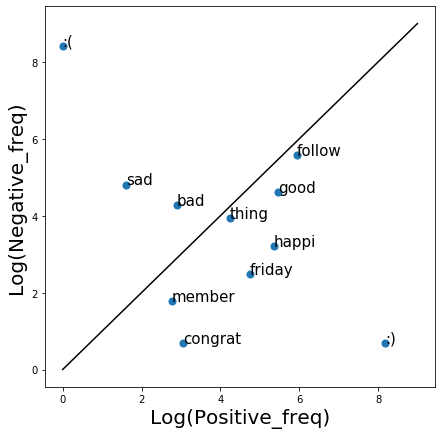

In [97]:
plt.figure(figsize=(7,7))

plt.scatter(np.log([x[1] for x in table]),np.log([x[2] for x in table]),s=50)

for vector in table:
    plt.annotate(vector[0],(np.log(vector[1]),np.log(vector[2])),fontsize=15)

plt.plot([0,9],[0,9],"k")

plt.xlabel("Log(Positive_freq)",fontsize=20)
plt.ylabel("Log(Negative_freq)",fontsize=20)

plt.show()